In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize
from datetime import datetime

In [41]:
#Loading Json
with open("logins.json") as json_file:
    login_data=json.load(json_file)

login_time_norm =json_normalize(login_data, 'login_time')
login_time_norm.columns = ['timeStamp']

# Creating DateTime objects
login_time_norm['timeStamp'] = pd.to_datetime(login_time_norm['timeStamp'], format= '%Y/%m/%d %H:%M:%S')
login_time_norm

,timeStamp
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [42]:
#adding a dummy variable 'n'

login_time_norm['n'] =np.arange(len(login_time_norm))
login_time_norm

,timeStamp,n
0,1970-01-01 20:13:18,0
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,2
3,1970-01-01 20:16:36,3
4,1970-01-01 20:26:21,4
...,...,...
93137,1970-04-13 18:50:19,93137
93138,1970-04-13 18:43:56,93138
93139,1970-04-13 18:54:02,93139
93140,1970-04-13 18:57:38,93140


In [43]:
#setting the 'timeStamp' column as the index

login_time_norm= login_time_norm.set_index('timeStamp')
login_time_norm

,n
timeStamp,
1970-01-01 20:13:18,0
1970-01-01 20:16:10,1
1970-01-01 20:16:37,2
1970-01-01 20:16:36,3
1970-01-01 20:26:21,4
...,...
1970-04-13 18:50:19,93137
1970-04-13 18:43:56,93138
1970-04-13 18:54:02,93139


In [44]:
# aggregating the number of logins per 15 minute 

login_15mins=login_time_norm.n.resample('15Min').count()
login_15mins

timeStamp
1970-01-01 20:00:00    2
1970-01-01 20:15:00    6
1970-01-01 20:30:00    9
1970-01-01 20:45:00    7
1970-01-01 21:00:00    1
                      ..
1970-04-13 17:45:00    5
1970-04-13 18:00:00    5
1970-04-13 18:15:00    2
1970-04-13 18:30:00    7
1970-04-13 18:45:00    6
Freq: 15T, Name: n, Length: 9788, dtype: int64

In [45]:
# turning the Series into a data frame and  creating  date  and day columns


df_15mins = pd.DataFrame(login_15mins)
df_15mins['dates'] = df_15mins.index
df_15mins['dates'] = pd.to_datetime(df_15mins['dates']).dt.normalize()
df_15mins['day'] = df_15mins['dates'].dt.day_name()
df_15mins

,n,dates,day
timeStamp,,,
1970-01-01 20:00:00,2,1970-01-01,Thursday
1970-01-01 20:15:00,6,1970-01-01,Thursday
1970-01-01 20:30:00,9,1970-01-01,Thursday
1970-01-01 20:45:00,7,1970-01-01,Thursday
1970-01-01 21:00:00,1,1970-01-01,Thursday
...,...,...,...
1970-04-13 17:45:00,5,1970-04-13,Monday
1970-04-13 18:00:00,5,1970-04-13,Monday
1970-04-13 18:15:00,2,1970-04-13,Monday


In [40]:
#creating an array of saturday dates to use as axvlines

saturday =df_15mins[df_15mins['day'] == 'Saturday']
saturday_line= saturday.index
saturday_line

DatetimeIndex(['1970-01-03 00:00:00', '1970-01-03 00:15:00',
               '1970-01-03 00:30:00', '1970-01-03 00:45:00',
               '1970-01-03 01:00:00', '1970-01-03 01:15:00',
               '1970-01-03 01:30:00', '1970-01-03 01:45:00',
               '1970-01-03 02:00:00', '1970-01-03 02:15:00',
               ...
               '1970-04-11 21:30:00', '1970-04-11 21:45:00',
               '1970-04-11 22:00:00', '1970-04-11 22:15:00',
               '1970-04-11 22:30:00', '1970-04-11 22:45:00',
               '1970-04-11 23:00:00', '1970-04-11 23:15:00',
               '1970-04-11 23:30:00', '1970-04-11 23:45:00'],
              dtype='datetime64[ns]', name='timeStamp', length=1440, freq=None)

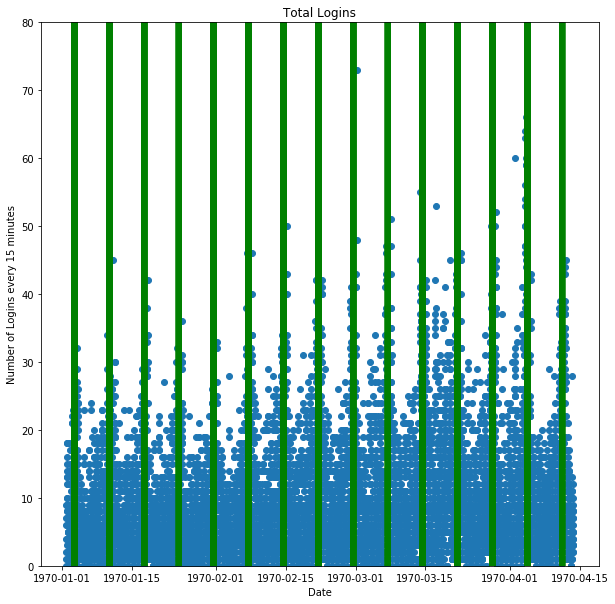

In [55]:
#creating a plot of all the data

plt.plot_date(df_15mins.index, df_15mins['n'])
plt.rcParams['figure.figsize'] = (10,10)
plt.title('Total Logins')
plt.ylabel('Number of Logins every 15 minutes')
plt.xlabel('Date')
plt.ylim([0, 80])

for line in saturday_line:
    plt.axvline(line,color='g')
    


In [46]:
#descriptive statistics of the data

df_15mins.describe()

,n
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


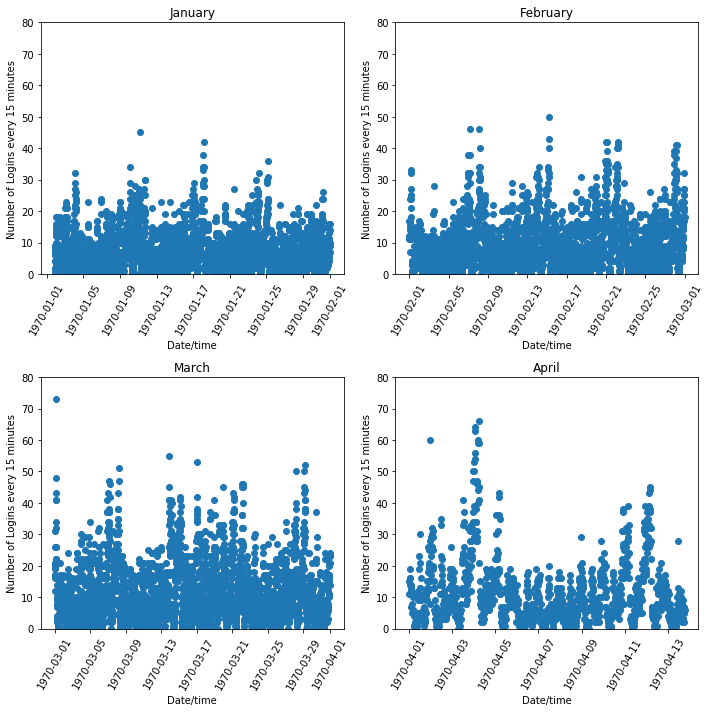

In [51]:
# plots of the data by month


df_15mins_Jan=df_15mins['1970-01-01':'1970-01-31']
df_15mins_Feb=df_15mins['1970-02-01':'1970-02-28']
df_15mins_Mar=df_15mins['1970-03-01':'1970-03-31']
df_15mins_Apr=df_15mins['1970-04-01':'1970-04-15']

plt.subplot(2, 2, 1)
plt.plot_date(df_15mins_Jan.index, df_15mins_Jan['n'])
plt.title('January')
plt.ylabel('Number of Logins every 15 minutes')
plt.xlabel('Date/time')
plt.xticks(rotation=60)
plt.ylim([0, 80])


plt.subplot(2, 2, 2)
plt.plot_date(df_15mins_Feb.index, df_15mins_Feb['n'])
plt.title('February')
plt.ylabel('Number of Logins every 15 minutes')
plt.xlabel('Date/time')
plt.xticks(rotation=60)
plt.ylim([0, 80])

plt.subplot(2, 2, 3)
plt.plot_date(df_15mins_Mar.index, df_15mins_Mar['n'])
plt.title('March')
plt.ylabel('Number of Logins every 15 minutes')
plt.xlabel('Date/time')
plt.xticks(rotation=60)
plt.ylim([0, 80])

plt.subplot(2, 2, 4)
plt.plot_date(df_15mins_Apr.index, df_15mins_Apr['n'])
plt.title('April')
plt.ylabel('Number of Logins every 15 minutes')
plt.xlabel('Date/time')
plt.xticks(rotation=60)
plt.ylim([0, 80])

plt.tight_layout()

In [54]:
# summary statistics by month

print(df_15mins_Jan.describe())
print(df_15mins_Feb.describe())
print(df_15mins_Mar.describe())
print(df_15mins_Apr.describe())

                 n
count  2896.000000
mean      7.333909
std       6.099863
min       0.000000
25%       3.000000
50%       6.000000
75%      10.000000
max      45.000000
                 n
count  2688.000000
mean      9.178943
std       7.796656
min       0.000000
25%       3.000000
50%       7.000000
75%      13.000000
max      50.000000
                 n
count  2976.000000
mean     11.331653
std       9.335820
min       0.000000
25%       4.000000
50%       9.000000
75%      16.000000
max      73.000000
                 n
count  1228.000000
mean     10.999186
std       9.969840
min       0.000000
25%       4.000000
50%       8.000000
75%      15.000000
max      66.000000
